# 2.3 直方图处理与函数绘图
## 2.3.1 生成并绘制图像的直方图
工具箱中用于处理图像直方图的核心函数是 `imhist`，其基本语法：

In [ ]:
h = imhist(f, b)

### 例 2.4 计算并绘制图像直方图

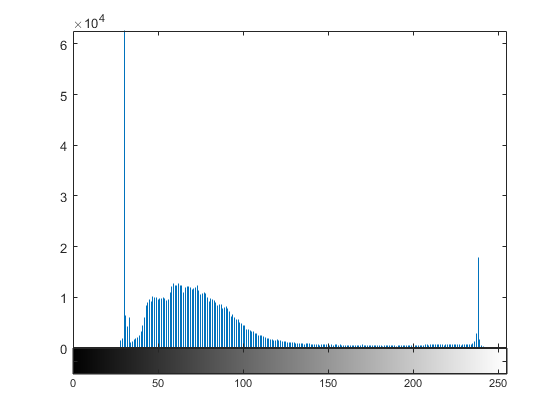

In [1]:
f = imread('Fig0203(a).tif');
imhist(f)

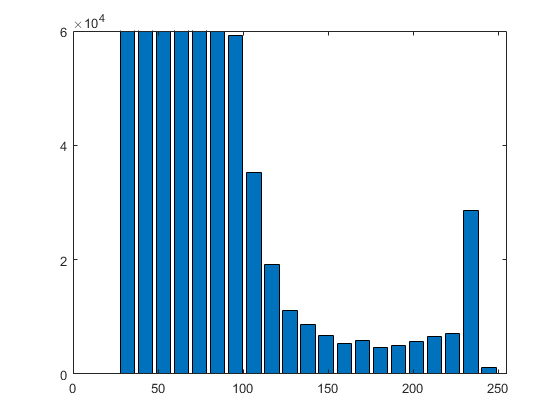

In [11]:
f = imread('Fig0203(a).tif');
h = imhist(f, 25);
horz = linspace(0, 255, 25);
bar(horz, h)
axis([0 255 0 60000])
set(gca, 'xtick', 0:50:255)
set(gca, 'ytick', 0:20000:60000)

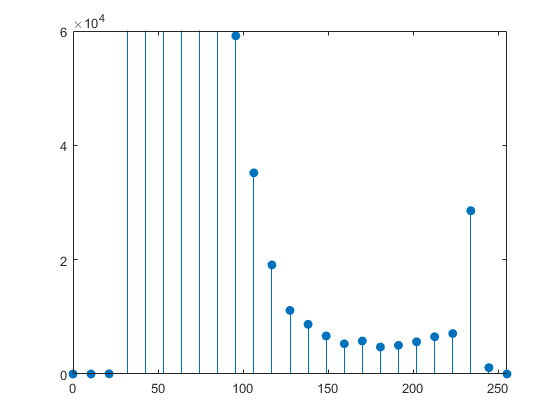

In [12]:
f = imread('Fig0203(a).tif');
h = imhist(f, 25);
horz = linspace(0, 255, 25);
stem(horz, h, 'fill')
axis([0 255 0 60000])
set(gca, 'xtick', 0:50:255)
set(gca, 'ytick', 0:20000:60000)

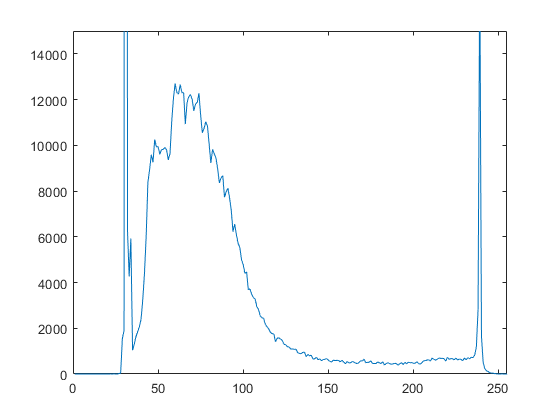

In [13]:
f = imread('Fig0203(a).tif');
hc = imhist(f);
plot(hc)
axis([0 255 0 15000])
set(gca, 'xtick', 0:50:255)
set(gca, 'ytick', 0:2000:15000)

## 2.3.2 直方图均衡化

### 例2.5 直方图均衡化

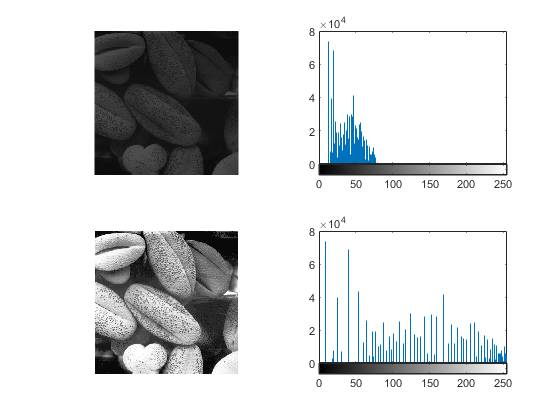

In [28]:
f = imread('Fig0208(a).tif');

subplot(221)
imshow(f)

subplot(222)
imhist(f)
ylim('auto')

g = histeq(f, 256);

subplot(223)
imshow(g)

subplot(224)
imhist(g)
ylim('auto')

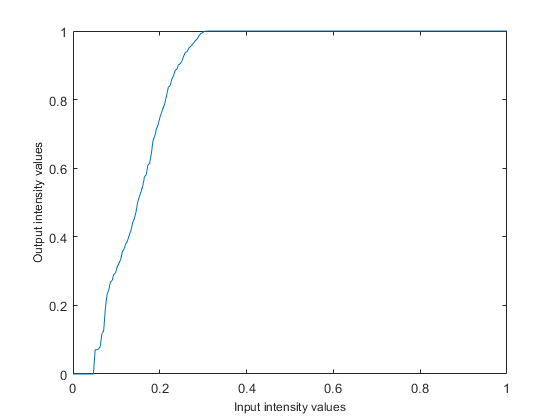

In [24]:
hnorm = imhist(f)./numel(f);
cdf = cumsum(hnorm);

x = linspace(0, 1, 256);
plot(x, cdf)
axis([0 1 0 1]);
set(gca, 'xtick', 0:.2:1)
set(gca, 'ytick', 0:.2:1)
xlabel('Input intensity values', 'fontsize', 9)
ylabel('Output intensity values', 'fontsize', 9)

## 2.3.3 直方图匹配法

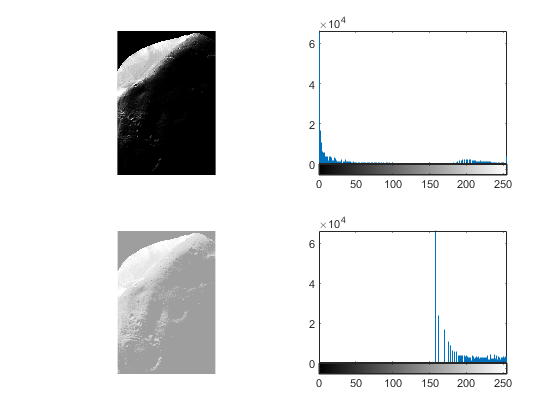

In [7]:
f = imread('Fig0210(a).tif');
f1 = histeq(f, 256);

subplot(221), imshow(f)
subplot(222), imhist(f)
subplot(223), imshow(f1)
subplot(224), imhist(f1)

## 2.3.4 函数 adapthisteq

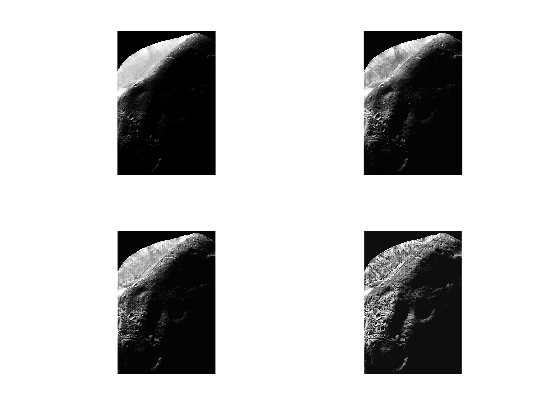

In [6]:
f = imread('Fig0210(a).tif');
g1 = adapthisteq(f);
g2 = adapthisteq(f, 'NumTiles', [25 25]);
g3 = adapthisteq(f, 'NumTiles', [25 25], 'ClipLimit', 0.05);

subplot(221), imshow(f)
subplot(222), imshow(g1)
subplot(223), imshow(g2)
subplot(224), imshow(g3)